# Automatidata - Statistical Review

This work focuses on applying statistical analysis to interpret data, covering key concepts such as descriptive statistics and hypothesis testing. The analysis involves examining the provided data through A/B testing and hypothesis testing. The objective is to utilize descriptive statistics and hypothesis testing to explore whether a link exists between payment type and fare amounts. Specifically, it aims to see if credit card users tend to pay higher fares than those using cash.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [59]:
# reading the data
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [60]:
# creating a dictionary mapping old payment type values to new names
payment_type_mapping = { 1: "Credit Card",
                         2: "Cash",
                         3: "No Charge",
                         4: "Dispute",
                         5: "Unknown",
                         6: "Voided Trip" }

# calculating the mean fare amount for each payment type
mean_fare_by_payment_type = df.groupby("payment_type").mean(numeric_only=True)[["fare_amount"]]

# renaming the index using the mapping
mean_fare_by_payment_type.index = mean_fare_by_payment_type.index.map(payment_type_mapping)

mean_fare_by_payment_type.head()

,fare_amount
payment_type,
Credit Card,13.429748
Cash,12.213546
No Charge,12.186116
Dispute,9.913043


In [61]:
# isolating the values for credit card and cash
mask = mean_fare_by_payment_type.index.isin(["Credit Card", "Cash"])
filtered_df = mean_fare_by_payment_type[mask]

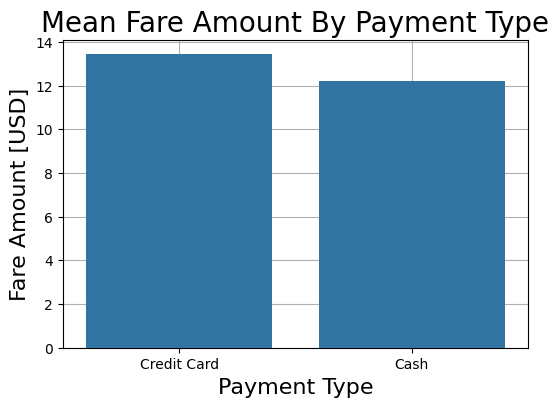

In [62]:
# creating bar plot for mean fare amounts by payment type
plt.figure(figsize=(6,4))
ax = sns.barplot(x=filtered_df.index,
                 y=filtered_df["fare_amount"],
                 zorder=3)
plt.title("Mean Fare Amount By Payment Type", fontsize=20)
plt.ylabel("Fare Amount [USD]", fontsize=16)
plt.xlabel("Payment Type", fontsize=16)
plt.grid(zorder=0)

Descriptive statistics help by providing a quick overview and comparison of average fare amounts across different payment methods. It appears that credit card payments are associated with higher fare amounts compared to cash payments. However, this difference could be due to random variation rather than a true distinction. A hypothesis test is needed to determine if the difference is statistically meaningful.

* Null Hypothesis (H₀): There is no difference in average fare amounts between credit card and cash payments.
* Alternative Hypothesis (H₁): There is a difference in average fare amounts between credit card and cash payments.

In [63]:
# statistical significance
threshold = 0.05

In [64]:
# hypothesis testing
cash = df[df["payment_type"] == 2]["fare_amount"]
credit_card = df[df["payment_type"] == 1]["fare_amount"]
res = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
p = res[1]
print(res)
print("p =", p)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)
p = 6.797387473030518e-12


In [65]:
if p < threshold:
    print("We reject the null hypothesis.")
else:
    print("We do not reject the null hypothesis.")

We reject the null hypothesis.


For this activity, the hypothesis test is the core component of the A/B analysis. Given the p-value is significantly lower than the 5% significance level, we reject the null hypothesis. The primary business insight is that promoting credit card payments could increase overall revenue for taxi drivers. This analysis assumes that customers complied with the payment method requirements during data collection. Since the dataset did not originally categorize payments this way, an assumption was made to randomly split the data for the A/B test. Additionally, it is possible that fare amount influences payment type rather than the reverse (passengers might find it easier to pay for longer trips using a credit card due to not carrying enough cash).